In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_info.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39.0
1,2,Male,21,15,81.0
2,3,Female,20,16,6.0
3,4,Female,23,16,77.0
4,5,Female,31,17,40.0


In [3]:
df.drop("CustomerID", axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39.0
1,Male,21,15,81.0
2,Female,20,16,6.0
3,Female,23,16,77.0
4,Female,31,17,40.0


In [4]:
df.rename(columns={"Gender": "gender", "Age": "age", "Annual Income (k$)": "income",
                   "Spending Score (1-100)": "spend"}, inplace=True)
df.columns

Index(['gender', 'age', 'income', 'spend'], dtype='object')

In [5]:
df.shape

(143, 4)

In [6]:
df.describe()

,age,income,spend
count,143.000000,143.000000,142.000000
mean,39.818182,48.090909,49.549296
std,15.649162,17.795754,22.174222
min,18.000000,15.000000,3.000000
25%,26.000000,33.500000,41.000000
50%,38.000000,49.000000,49.000000
75%,50.500000,63.000000,59.750000
max,70.000000,76.000000,98.000000


# Vizulization

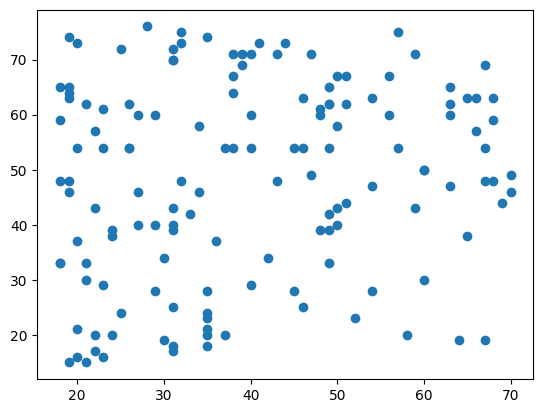

In [7]:
plt.scatter(df.age, df.income)

Text(0.5, 0, 'income')

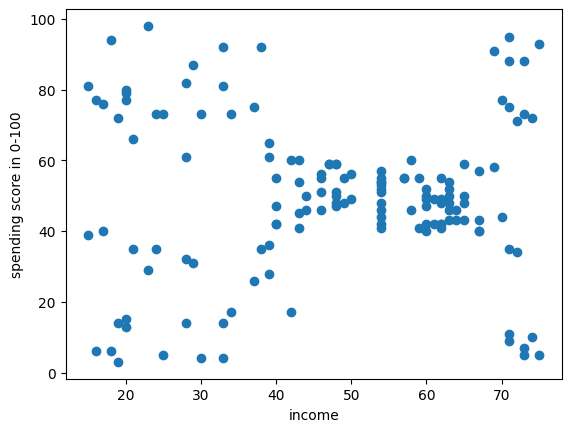

In [10]:
plt.scatter(df.income, df.spend)
plt.ylabel("spending score in 0-100")
plt.xlabel("income")

# Pairplot

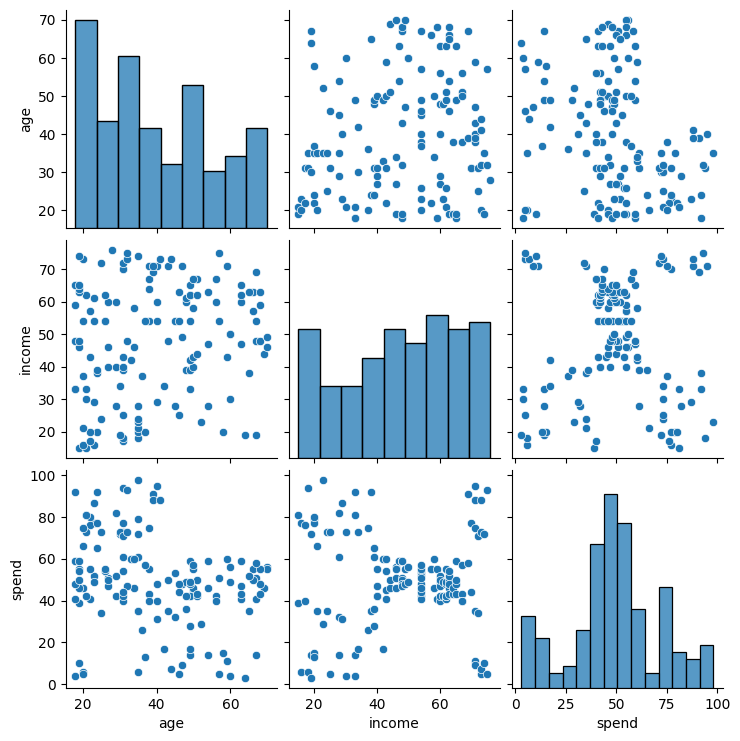

In [11]:
sns.pairplot(df[['age', 'income', 'spend']])

# K-Means Cluster

In [12]:
from sklearn.cluster import KMeans

In [16]:
df.isnull().sum()

gender    0
age       0
income    0
spend     1
dtype: int64

In [17]:
df['spend'].fillna(round(df['spend'].mean()), inplace=True)

In [18]:
df.isnull().sum()

gender    0
age       0
income    0
spend     0
dtype: int64

In [13]:
km = KMeans()

In [21]:
km.fit(df[['spend', 'income']])

KMeans()

In [22]:
df['new_cluster'] = km.predict(df[['spend', 'income']])

In [23]:
df.head()

,gender,age,income,spend,new_cluster
0,Male,19,15,39.0,7
1,Male,21,15,81.0,3
2,Female,20,16,6.0,2
3,Female,23,16,77.0,3
4,Female,31,17,40.0,7


# Vizulization model

In [29]:
clu = [[] for _ in range(8)]
for i in range(8):
    clu[i] = df[df.new_cluster == i]

clu

[     gender  age  income  spend  new_cluster
 79   Female   49      54   42.0            0
 82     Male   67      54   41.0            0
 83   Female   46      54   44.0            0
 89   Female   50      58   46.0            0
 91     Male   18      59   41.0            0
 93   Female   40      60   40.0            0
 94   Female   56      60   42.0            0
 96   Female   63      60   47.0            0
 98     Male   48      61   42.0            0
 100  Female   49      62   48.0            0
 102    Male   63      62   41.0            0
 104    Male   21      62   42.0            0
 105  Female   51      62   42.0            0
 107    Male   54      63   46.0            0
 108  Female   68      63   43.0            0
 109    Male   46      63   48.0            0
 112  Female   38      64   43.0            0
 113    Male   19      64   46.0            0
 114  Female   18      65   48.0            0
 116  Female   63      65   43.0            0
 118  Female   51      67   43.0  

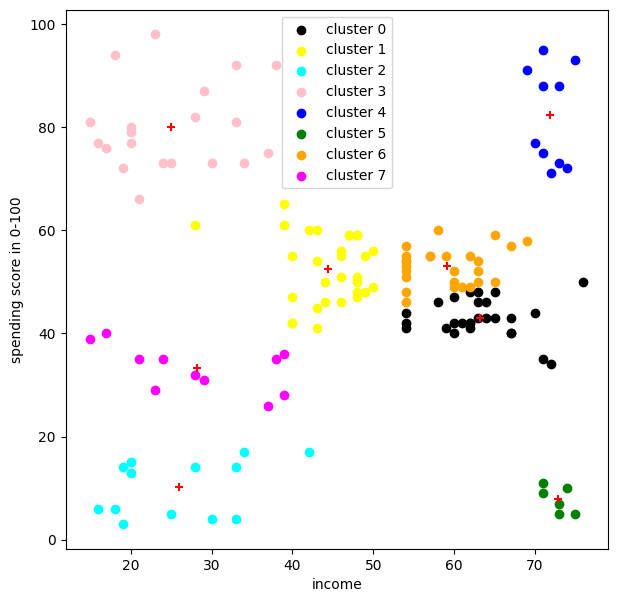

In [39]:
colors = ['black', 'yellow', 'cyan', 'pink', 'blue', 'green', 'orange', 'magenta']

plt.figure(figsize=(7, 7))

for i in range(8):
    plt.scatter(clu[i].income, clu[i].spend, color=colors[i], label = f'cluster {i}')

plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:, 0], color='red', marker='+')

plt.ylabel("spending score in 0-100")
plt.xlabel("income")

plt.legend()
plt.show()

# Optimizing K-Means

In [40]:
wcss = []
clusters_range = range(1, 15)

for i in clusters_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['spend', 'income']])
    wcss.append(km.inertia_)

wcss

[114299.17482517484,
 80762.86835699795,
 43936.44384057971,
 30310.87794910685,
 25316.620238095238,
 17874.57463369963,
 10561.334818334815,
 9246.024502955537,
 8920.829562594266,
 7209.061422252211,
 6808.275757738994,
 5755.2352154424525,
 5701.92374847375,
 4667.223988692468]

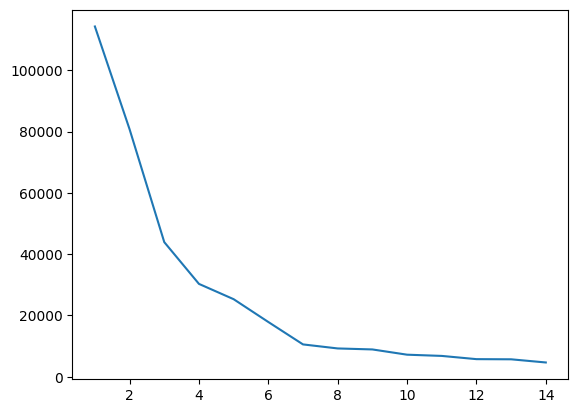

In [41]:
plt.plot(clusters_range, wcss)

In [42]:
kmF = KMeans(n_clusters=7)
kmF.fit(df[['spend', 'income']])

KMeans(n_clusters=7)

In [48]:
df['new_cluster'] = kmF.predict(df[['spend', 'income']])

In [49]:
clu = [[] for _ in range(7)]
for i in range(7):
    clu[i] = df[df.new_cluster == i]

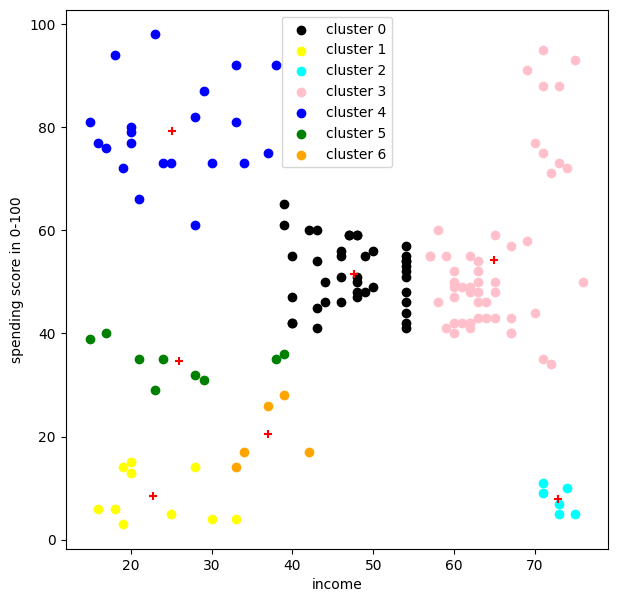

In [50]:
colors = ['black', 'yellow', 'cyan', 'pink', 'blue', 'green', 'orange']

plt.figure(figsize=(7, 7))

for i in range(7):
    plt.scatter(clu[i].income, clu[i].spend, color=colors[i], label = f'cluster {i}')

plt.scatter(kmF.cluster_centers_[:,1], kmF.cluster_centers_[:, 0], color='red', marker='+')

plt.ylabel("spending score in 0-100")
plt.xlabel("income")

plt.legend()
plt.show()